# <center> Импорт библоиотек <center>

*NOTE*: не забудьте соствить список библиотек, необходимых для реализации ваших решений, и представить их в файле `requirements.txt`.

In [242]:
import pickle
import random
import json
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score , accuracy_score

In [302]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# <center> Чтение данных <center>

Тренировчные данные представлены в виде файла в формате JSON. В котором верхенеуровневый ключ -- это номер образца (бакетрии). Каждый словарь по бактериям содержит название штамма и результаты масс-спектрометрического анализа, которые представлены следующими полями: масса к заряду (m/z), время (time), интенсивность пика (Intens.), разрешение (Res.), площадь пика (Area), относительная интенсивность (Rel. Intens.), ширина на полувысоте (FWHM=full width at half-maximum intensity). Каждый штамм будет представлен несколькими бактериями.

In [244]:
with open('train.json', 'rb') as fp:
    train_d = json.load(fp)
train_df = pd.DataFrame(json.loads(train_d)).T

In [245]:
with open('sample_test.json', 'rb') as fp:
    train_d = json.load(fp)
sample_test = pd.DataFrame(json.loads(train_d)).T

In [246]:
sample_test.shape, sample_test.head(5)

((10, 9),
                                                  m/z  \
 0  [2045.466540848249, 2132.653497583639, 2590.18...   
 1  [2132.343030013472, 2589.665689659304, 2807.58...   
 2  [2132.9758745717, 2589.792596354722, 2807.7630...   
 3  [2132.116326307731, 2259.791983346751, 2589.75...   
 4  [2070.45854255125, 2109.64814022531, 2142.0090...   
 
                                                 time  \
 0  [45214.4742032189, 46153.13074616308, 50790.77...   
 1  [46149.8227167185, 50785.73833364729, 52849.66...   
 2  [46156.56541500456, 50786.96509544219, 52851.3...   
 3  [46147.40703811593, 47488.09043544187, 50786.5...   
 4  [45485.55461027367, 45907.35176135621, 46252.7...   
 
                                              Intens.  \
 0  [809.9273376464844, 1650.626678466797, 885.306...   
 1  [765.5713806152344, 1774.656524658203, 1401.84...   
 2  [913.3709716796875, 1459.96533203125, 1123.716...   
 3  [1778.195617675781, 676.5759887695312, 846.620...   
 4  [1088.3680114

In [247]:
train_df.shape

(256, 10)

In [248]:
train_df.head(5)

,strain,m/z,time,Intens.,SN,Res.,Area,Rel. Intens.,FWHM,Bk. Peak
0,Acinetobacter baumani_121 skin,"[2131.496344969094, 2259.721110106408, 2588.85...","[46140.80006771147, 47487.35689905193, 50777.8...","[2894.089294433594, 886.8892822265625, 868.547...","[10.14621708940436, 3.128197998996987, 3.13016...","[501.3893306058393, 554.1613032118989, 570.494...","[20801.59355425023, 5168.433783919987, 5449.07...","[0.07505194053740191, 0.02299955353863887, 0.0...","[4.251180100688543, 4.077731694741487, 4.53790...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Acinetobacter baumani_126,"[2132.413484429545, 2589.569703463259, 2718.11...","[46150.57342911904, 50784.81044928727, 52012.3...","[1608.209228515625, 2417.604553222656, 859.648...","[5.653855828544429, 8.654048108890505, 3.10129...","[444.1771425249818, 635.5107637820196, 483.527...","[10814.55846969845, 12028.48312655044, 5520.91...","[0.02893426423838925, 0.04349658472700257, 0.0...","[4.800817692480905, 4.074784962023841, 5.62141...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Acinetobacter baumani_352 blood,"[2132.015451945306, 2153.878241508351, 2259.87...","[46146.33211339091, 46378.71090478855, 47488.9...","[1866.973510742188, 485.8263549804688, 681.809...","[11.83020550375331, 3.078471968396353, 4.34397...","[443.8745083022766, 640.6100835523926, 544.133...","[12040.31060128594, 3195.814563977061, 4030.91...","[0.08492296048402985, 0.02209876685915333, 0.0...","[4.803194173280644, 3.362229688244042, 4.15316...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Acinetobacter baumani_377 blood,"[2132.20685843954, 2260.448073902672, 2718.433...","[46148.3717335632, 47494.88041019896, 52015.37...","[3645.139465332031, 1418.627136230469, 1589.31...","[8.174123737158272, 3.221722550466876, 3.65418...","[495.2192689604989, 536.1846844978652, 538.687...","[24567.31750988411, 8997.489590029167, 13940.8...","[0.06574632118612184, 0.02558736537491051, 0.0...","[4.305581369875199, 4.215801270078373, 5.04640...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Acinetobacter baumani_503 blood,"[2133.566060793301, 2590.134696892168, 2808.64...","[46162.85270300643, 50790.27190934689, 52859.5...","[949.0652465820312, 1905.545837402344, 1346.90...","[3.978854975609214, 8.182117419302115, 5.82037...","[450.3944872128542, 589.7283351657542, 579.576...","[8922.753283805023, 11711.32326221974, 9984.74...","[0.0366567284548468, 0.07359986741847667, 0.05...","[4.737105185270593, 4.392081137095374, 4.84602...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [249]:
## Посмотрим сколько классов данных и сколько примеров на каждый класс
train_df.groupby('strain').agg({'strain': "count"})

,strain
strain,
Acinetobacter baumani_121 skin,9
Acinetobacter baumani_126,9
Acinetobacter baumani_352 blood,10
Acinetobacter baumani_377 blood,11
Acinetobacter baumani_503 blood,11
Acinetobacter baumani_63,9
Acinetobacter baumani_64,11
Acinetobacter baumani_73,10
Acinetobacter baumani_74,11


Так как тренировочный набор данных не очень большой, дополним его симмулированными данными. Для этого составим дополнительные примеры из существующих. Зададим seed для воспроизводимости результатов.

In [250]:
# для начала орпеделим количестов пиков в масс-спектрах
train_df.loc[:,'n_peak'] = train_df['m/z'].apply(len)

In [251]:
def get_dif(x):
    return max(x) - min(x)

In [252]:
# посмотрим на сколько по количеству строк (пиков) различаются таблицы внутри каждого штамма
peaks_dif = train_df.groupby(['strain']).agg({'n_peak': get_dif})

<AxesSubplot:xlabel='n_peak', ylabel='Count'>

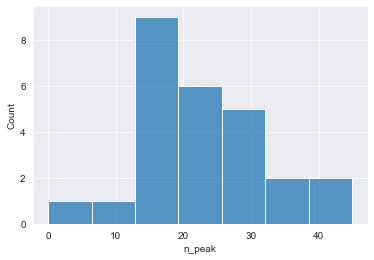

In [253]:
sns.histplot(peaks_dif.n_peak)

In [254]:
# будем использовать среднюю разности для варьирвания числа пиков в сгенерированных данных
mean_dif = int(peaks_dif.n_peak.mean()) 

In [255]:
FEATURES = ['m/z', 'time', 'Intens.', 'SN', 'Res.', 'Area', 'Rel. Intens.', 'FWHM', 'Bk. Peak']

In [256]:
np.random.seed(142)
train_gen = pd.DataFrame()
for strain in train_df.strain.unique():
    tmp = train_df[train_df.strain == strain]
    n_samples = tmp.shape[0]
    s = np.random.randint(max(tmp.n_peak) - mean_dif, max(tmp.n_peak), 20)
    strain_df = pd.DataFrame()
    
    for i,sample in enumerate(tmp[FEATURES].values):
        tmp_i = pd.DataFrame(list(sample)).T
        tmp_i.columns = FEATURES
        strain_df = pd.concat([ strain_df, tmp_i])
    for i in range(0,20):
        df_i = pd.DataFrame()
        idx = []
        for n in range(0,s[i]):
            if isinstance(strain_df.loc[n], pd.Series):
                continue
            else:
                df_i = pd.concat([df_i, strain_df.loc[n].sample(n=1)])
        df_i[['id']] = i
        df_i.loc[:, 'strain'] = tmp.strain.unique()[0]
        df_i.loc[:, 'n_peak'] = n
        train_gen = pd.concat([train_gen, df_i])        

In [257]:
train_gen.shape

(41140, 12)

In [258]:
train_df["strain"].unique()

array(['Acinetobacter baumani_121 skin', 'Acinetobacter baumani_126',
       'Acinetobacter baumani_352 blood',
       'Acinetobacter baumani_377 blood',
       'Acinetobacter baumani_503 blood', 'Acinetobacter baumani_63',
       'Acinetobacter baumani_64', 'Acinetobacter baumani_73',
       'Acinetobacter baumani_74', 'Pseudomonas aeruginosa_XXX',
       'Pseudomonas fluorescence_965', 'Pseudomonas spp_467',
       'Staphilococcus aureus_1 949', 'Staphilococcus aureus_1027 q',
       'Staphilococcus aureus_11 K817', 'Staphilococcus aureus_12 K457',
       'Staphilococcus aureus_15', 'Staphilococcus aureus_16',
       'Staphilococcus aureus_19 MRSA', 'Staphilococcus aureus_3 1027',
       'Staphilococcus aureus_4 948', 'Staphilococcus aureus_6 1006',
       'Staphilococcus aureus_7 941', 'Staphilococcus aureus_8 942',
       'Staphilococcus aureus_9 963', 'Staphilococcus aureus_K160'],
      dtype=object)

In [259]:
train_gen1 = train_gen.groupby(['strain', 'id'])

In [260]:
train_gen1.agg(list).reset_index().drop(['id'], axis = 1)

,strain,m/z,time,Intens.,SN,Res.,Area,Rel. Intens.,FWHM,Bk. Peak,n_peak
0,Acinetobacter baumani_121 skin,"[2131.44693706268, 2259.89647883666, 2589.3550...","[46140.27349983386, 47489.17194030473, 50782.7...","[2667.027709960938, 695.579833984375, 1001.727...","[10.73403875357084, 3.016303406416068, 4.07576...","[503.3876906101543, 467.3407918378317, 622.322...","[16467.31832742578, 4468.351038047419, 5648.07...","[0.06302785258705716, 0.01563506895872684, 0.0...","[4.23420551757863, 4.835649954607106, 4.160793...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 6..."
1,Acinetobacter baumani_121 skin,"[2131.636460536186, 2153.446935231046, 2830.20...","[46142.29332493736, 46374.13802458277, 53059.2...","[5407.696533203125, 954.5009155273438, 1745.74...","[10.77457620055245, 3.052984798272852, 4.20436...","[470.508914261531, 574.7883278960221, 626.0552...","[38213.63845945249, 5350.40309746243, 12307.79...","[0.05543050311074659, 0.02122868214704491, 0.0...","[4.530491125512071, 3.746504288132655, 4.52069...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 5..."
2,Acinetobacter baumani_121 skin,"[2131.464750897199, 2589.25414937832, 2589.355...","[46140.46335260339, 50781.75991313501, 50782.7...","[3627.342651367188, 1535.975463867188, 1001.72...","[8.190572217797913, 5.247291285421668, 4.07576...","[499.1195818479691, 592.670385896903, 622.3224...","[28443.91269963334, 7874.245476834947, 5648.07...","[0.05769276421186779, 0.02279730485858287, 0.0...","[4.270449063540127, 4.368792858546385, 4.16079...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 6..."
3,Acinetobacter baumani_121 skin,"[2131.536317465484, 2153.446935231046, 2717.18...","[46141.22607263637, 46374.13802458277, 52003.6...","[1476.290405273438, 954.5009155273438, 1504.16...","[4.97244036223623, 3.052984798272852, 5.091897...","[486.2709576900277, 574.7883278960221, 670.025...","[11784.34255904453, 5350.40309746243, 7679.218...","[0.02191144534567221, 0.02122868214704491, 0.0...","[4.383433317899744, 3.746504288132655, 4.05534...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 6..."
4,Acinetobacter baumani_121 skin,"[2131.627236141278, 2259.721110106408, 2717.48...","[46142.19501906935, 47487.35689905193, 52006.4...","[2474.227172851562, 886.8892822265625, 1862.73...","[10.65951353966629, 3.128197998996987, 3.83820...","[530.0692050698312, 554.1613032118989, 583.808...","[16806.38252233549, 5168.433783919987, 10826.0...","[0.05561505750605028, 0.02299955353863887, 0.0...","[4.021413082958588, 4.077731694741487, 4.65475...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6..."
...,...,...,...,...,...,...,...,...,...,...,...
515,Staphilococcus aureus_K160,"[2045.317024367366, 2052.017658521933, 2070.33...","[45212.84746596056, 45285.69187153444, 45484.1...","[1610.177124023438, 743.2478485107422, 2217.77...","[3.867461972696695, 3.408752933641981, 6.82993...","[269.8473550232061, 611.8654080421028, 585.699...","[16886.49887868643, 5076.35272177538, 14391.18...","[0.08819864221226346, 0.05386941474819071, 0.1...","[7.579533340956687, 3.353707582666175, 3.53480...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 8..."
516,Staphilococcus aureus_K160,"[2045.820275547185, 2051.167143062795, 2070.41...","[45218.32259468395, 45276.45229859094, 45485.0...","[955.4886932373047, 1041.857162475586, 1085.75...","[3.607229081398068, 3.615323400371312, 4.97961...","[341.6805025778662, 408.8275314214143, 492.973...","[8974.65932911269, 7205.708938691459, 8541.956...","[0.06645393127673135, 0.06725976847321746, 0.0...","[5.987524193251148, 5.01719425776264, 4.199845...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 8..."
517,Staphiloc

In [261]:
train_gen = train_gen.groupby(['strain', 'id']).agg(list).reset_index().drop(['id'], axis = 1)
train_gen.loc[:,'n_peak'] = train_gen.n_peak.apply(min)

Совместим оригинальных датасет и сгенерированный.

In [262]:
train_df = pd.concat([train_df, train_gen[train_df.columns]])

In [263]:
train_df.shape

(776, 11)

# <center> Обработка данных и генерация признаков<center>

Пример таблицы с данными по масс-спектру для одного образца

In [264]:
example = train_df[FEATURES]\
         .loc[(train_df.strain == 'Staphilococcus aureus_6 1006')].iloc[0]
example = pd.DataFrame(list(example)).T
example.columns = FEATURES

In [265]:
example.head()

,m/z,time,Intens.,SN,Res.,Area,Rel. Intens.,FWHM,Bk. Peak
0,2141.595860,46248.308185,1849.671417,5.023842,449.793188,13621.062834,0.084247,4.761290,0.0
1,2154.140758,46381.493984,1299.384644,3.529223,458.732871,9421.672911,0.059183,4.695850,0.0
2,2180.436755,46659.416149,1203.332001,3.317415,443.973316,9161.078120,0.054808,4.911189,0.0
3,2297.759326,47879.408034,1426.807159,3.967446,620.345018,9085.341876,0.064987,3.704002,0.0
4,2764.201381,52445.360112,1586.883118,4.470495,629.209920,12546.815080,0.072278,4.393131,0.0


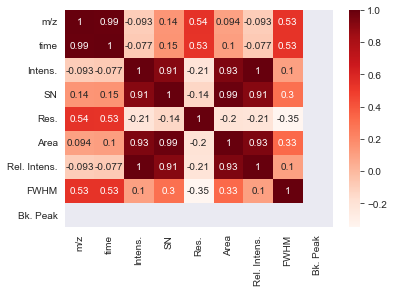

In [266]:
cor = example.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [267]:
## select uncorrelated features
FEATURES = ['m/z', 'Rel. Intens.', 'Res.', 'FWHM']

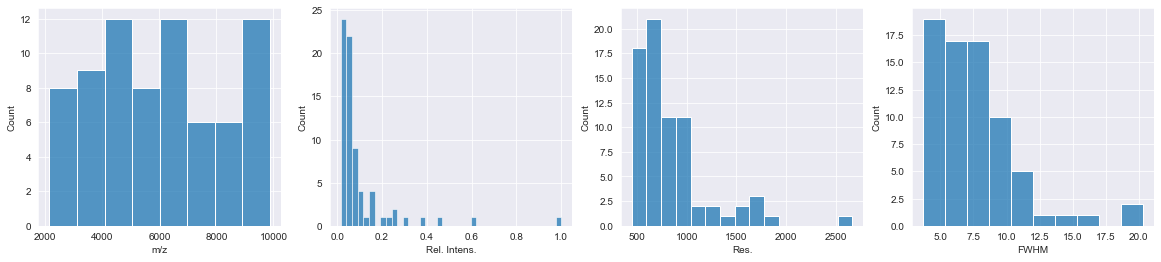

In [268]:
fig, axs = plt.subplots(1,4, figsize=(20, 4))
for features in FEATURES:
    sns.histplot(example[features], ax = axs[FEATURES.index(features)])

Посмотрим на масс-спектры для нескольих примеров

In [269]:
def colors_from_values(values, palette_name):
    values = np.array(values)
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

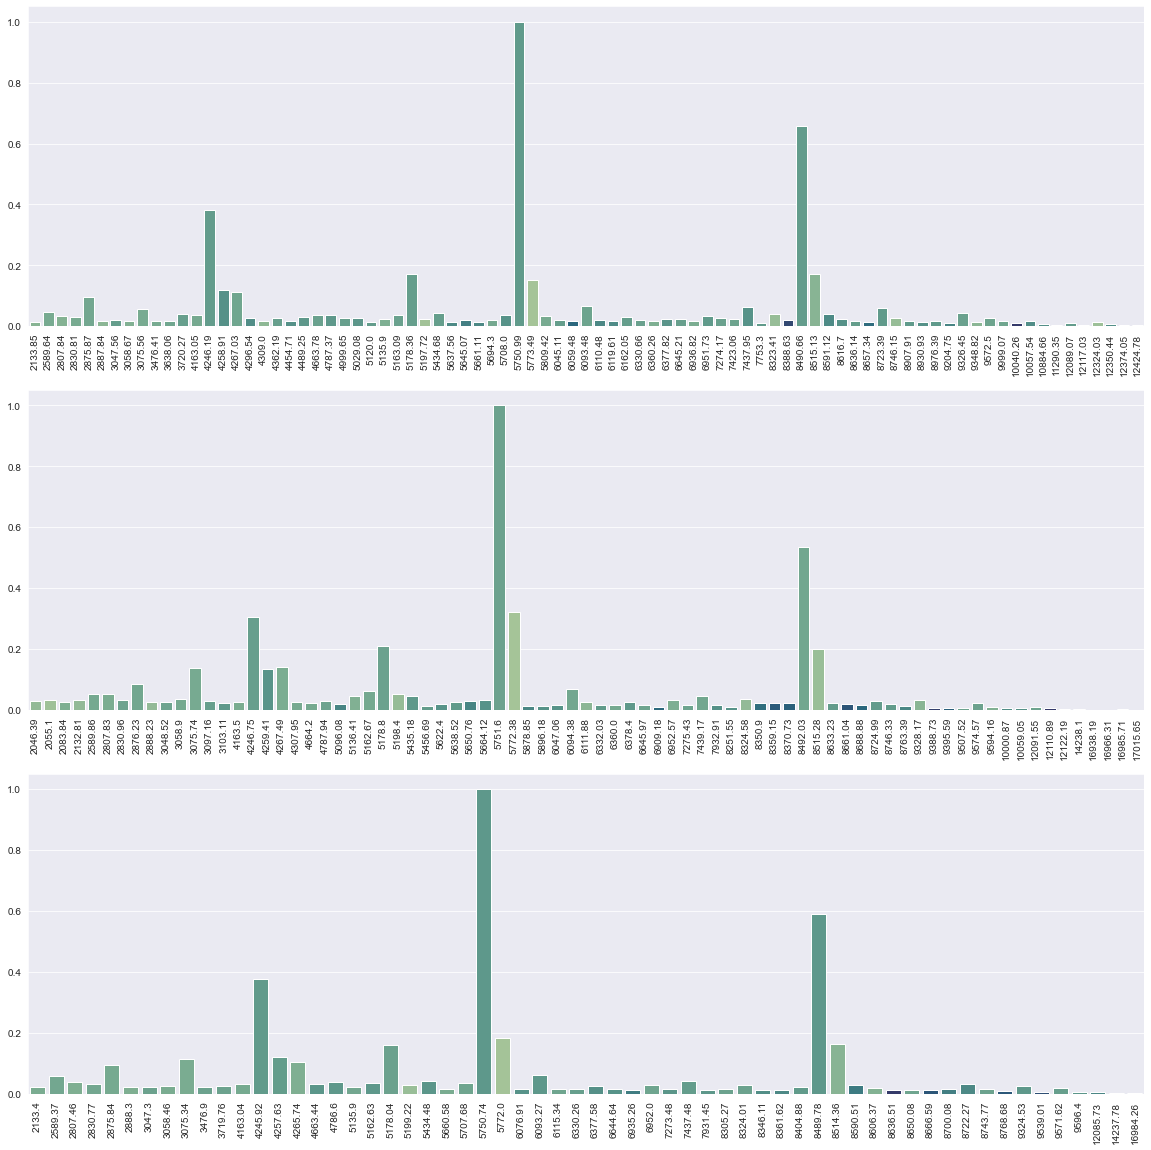

In [270]:
fig, axs = plt.subplots(3,1, figsize=(20,20))
strain = "Acinetobacter baumani_64"
i = 0
for ids in [2,6,8]:
    tmp = train_df.loc[(train_df.strain == strain)].iloc[ids]
    mz = [np.round(x, 2) for x in tmp['m/z']]
    ax =  axs[i]
    sns.barplot(data = tmp, x=mz, y = 'Rel. Intens.', 
                palette=colors_from_values(tmp['Res.'], 'crest'),
                ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    i=i+1

Создаим спектры, которые удобно сравнитвать между собой в виде векторов в фиксированом диапазоне, и уберем необходимость использовать переменную "m/z".

In [271]:
# орпеделим диапазон парамтеров
min(train_df['m/z'].apply(min)), max(train_df['m/z'].apply(max))

(2040.804289776974, 17241.93492389016)

In [272]:
def create_speactr(mz, intens):
    spec = []
    for i in range(200, 1750):
        if i in mz:
            spec.append(intens[mz.index(i)])
        else:
            spec.append(0)
    return spec

In [273]:
def prepocess_data(data):
    data['mz'] = data['m/z'].apply(lambda x: [int(x_i // 10) for x_i in x])
    data['intens'] = data.apply(lambda d: create_speactr(d['mz'], d['Rel. Intens.']),
                           axis = 1)
    return data

In [274]:
train_df = prepocess_data(train_df)

Перемешаем данные, чтобы классы не шли по порядку

In [275]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

# <center> Обучение моделей <center>

Разобьем выборку на валидационную и тренировочную так, чтобы хотя бы один пример из каждого класса присутствавал
в валидаицонной выборке. После разбиения уберем два класса из тренировочный выборки, чтобы можно было определить их 
как 'new'.

_Note_:  рекомендуем рассмотреть разные вариатны разбиения на тренировочную и валидационную выборку для определения оптиматльных парпамтеров. 

In [325]:
np.random.seed(142)
val_ds = pd.DataFrame()
train_ds = pd.DataFrame()
for strain in train_df.strain.unique():
    n = np.random.randint(1,4)
    ids = random.sample(list(train_df.loc[train_df.strain == strain].index), n)
    val_ds = pd.concat([val_ds, train_df.loc[ids]])
    train_ids = list(set(train_df.loc[train_df.strain == strain].index) - set(ids))
    train_ds = pd.concat([train_ds, train_df.loc[train_ids]])
    

In [326]:
val_ds.shape, train_ds.shape

((54, 13), (722, 13))

In [327]:
random.seed(111)
val_strain = random.sample(sorted(list(val_ds.strain.unique())), 2)
val_strain

['Acinetobacter baumani_64', 'Pseudomonas fluorescence_965']

In [328]:
train_ds = train_ds[~train_ds.strain.isin(val_strain)]

In [329]:
val_ds.loc[:,'target'] = val_ds.strain
val_ds.loc[val_ds.strain.isin(val_strain),'target'] = 'new'

In [330]:
val_ds = val_ds.sample(frac=1)
train_ds = train_ds.sample(frac=1)

In [331]:
def make_x(df, col):
    X = []
    for i in df.index:
        row = df.loc[i,col]
        X.append(row)
    return np.array(X)

## Многоклассовый классификатор

In [353]:
X = make_x(train_ds, col='intens')
y = np.array(train_ds['strain'])

In [354]:
from sklearn.ensemble import GradientBoostingClassifier

In [355]:
model = GradientBoostingClassifier()
clf = make_pipeline(StandardScaler(), model)
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

### проверяем качество модели на валидационной выборке

In [356]:
X_pred = make_x(val_ds, col='intens')

In [357]:
val_ds.loc[:,'class_name'] = clf.predict(X_pred)
val_ds.loc[:,'class_name_proba'] =  np.max(clf.predict_proba(np.array(X_pred)), axis = 1)

In [358]:
# посмотрим на качестов модели, то выделения новых классов
f1_score(val_ds.class_name, val_ds.target, average='macro')

0.8722857142857143

Новые классы будем орпеделять по вероятности определения класса

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([0.41750223, 0.47575173, 0.53400122, 0.59225071, 0.6505002 ,
        0.70874969, 0.76699918, 0.82524867, 0.88349817, 0.94174766,
        0.99999715]),
 <BarContainer object of 10 artists>)

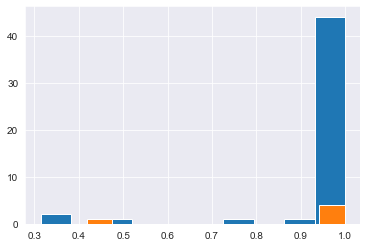

In [359]:
plt.hist(val_ds.loc[val_ds.target != 'new'].class_name_proba)
plt.hist(val_ds.loc[val_ds.target == 'new'].class_name_proba)

In [360]:
val_ds.loc[val_ds.class_name_proba < 0.2,'class_name'] = 'new'

In [361]:
f1_score(val_ds.class_name, val_ds.target, average='macro')

0.8722857142857143

Как мы видим, после добавления метки 'new' значение метрики возрасло

### сохранение модели

переобучим модель на всей тренировочной выборке, так как мы исключали классы для валидации

In [145]:
X = make_x(train_df, col='intens')
y = np.array(train_df['strain'])
model = GradientBoostingClassifier()
clf = make_pipeline(StandardScaler(), model)
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [147]:
swmPickle = open('models/matveyspiridonov/baseline_GradientBoostingClassifier.pkl', 'wb')
pickle.dump(clf, swmPickle)   

## Набор бинарных классификатров для каждого тарегта

In [569]:
X = make_x(train_ds, col='intens')
X_pred = make_x(val_ds, col='intens')

In [570]:
# делаем бинарных тарегет для каждого класса
Y = []
for strain in train_ds.strain.unique():
    Y.append(np.array(train_ds.strain == strain))

In [571]:
# сохраняем порядок классов
class_order = train_ds.strain.unique()

так как негативных примеров для каждого таргета в разы больше положительных, оставим в выборке только примеры в соотношении 3:1 (негативные:положительные)

In [572]:
res = []
for i,y in enumerate(Y):
    idx_pos = np.where(y ==True)[0]
    idx_neg = np.where(y == False)[0]
    random.shuffle(idx_neg)
    idx = sorted(np.concatenate((idx_pos,idx_neg[:3*len(idx_pos)])))
    
    model = RandomForestClassifier()
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X[idx,:], y[idx])
    res.append(clf.predict_proba(X_pred)[:,1])

### проверяем качество модели на валидационной выборке

In [573]:
res = np.array(res).T

In [574]:
# выбираем класс с наибльшей вероятностью или ставим 0, если веротяность меньше 0.5
class_name = []
for res_i in res:
    if max(res_i) > 0.5:
        class_name.append(class_order[np.where(res_i == max(res_i))[0][0]])
    else:
        class_name.append('new')

['Staphilococcus aureus_K160' 'Acinetobacter baumani_126'
 'Acinetobacter baumani_74' 'Staphilococcus aureus_6 1006'
 'Acinetobacter baumani_352 blood' 'Acinetobacter baumani_121 skin'
 'Staphilococcus aureus_11 K817' 'Staphilococcus aureus_3 1027'
 'Staphilococcus aureus_1027 q' 'Staphilococcus aureus_4 948'
 'Staphilococcus aureus_12 K457' 'Staphilococcus aureus_9 963'
 'Acinetobacter baumani_377 blood' 'Staphilococcus aureus_7 941'
 'Staphilococcus aureus_8 942' 'Acinetobacter baumani_73'
 'Acinetobacter baumani_63' 'Pseudomonas aeruginosa_XXX'
 'Staphilococcus aureus_19 MRSA' 'Acinetobacter baumani_503 blood'
 'Staphilococcus aureus_1 949' 'Staphilococcus aureus_16'
 'Pseudomonas spp_467' 'Staphilococcus aureus_15']


In [575]:
val_ds.loc[:,'class_name'] = class_name

In [576]:
f1_score(val_ds.class_name, val_ds.target, average='macro')

0.9588571428571429

Данная модель показала самое высокое значение метрики, поэтому берем ее как бейзлайн для данной задачи.

### сохраняем модели

In [577]:
# переобучаем на полной выборке
res = []
for i,y in enumerate(Y):
    idx_pos = np.where(y ==True)[0]
    idx_neg = np.where(y == False)[0]
    random.shuffle(idx_neg)
    idx = sorted(np.concatenate((idx_pos,idx_neg[:3*len(idx_pos)])))
    
    model = RandomForestClassifier()
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X[idx,:], y[idx])
    # save model
    strain = class_order[i]
    pickle.dump(clf, open(f'models/matveyspiridonov/randomForest_clf_{strain}.pkl', 'wb'))

# <center> Формат решения <center>

В проверяющую систему необходимо отправить код алгоритма, запакованный в ZIP-архив. Архив должен содержать следующие файлы: 
 * solution.py -- файл с кодом запуска решения
 * models/ -- директория, где хранятся обученные модели
 * requiremnts.txt -- необходимые библиотеки для запуска решения
 * \*.py -- вспомогательные модули
 * metadata.json  -- обязательный файл для запуска докера, который содержит название docker image и команду для расчета предсказаний (см. описание задачи)
 
Решение должно быть реализовано в виде программы, которая на вход принимает файл `test.xlsx` и на выходе выдает CSV таблицу (`results.csv`). Файл `results.csv` должен в обязательном порядке содержать поле `class_name`  -- предсказанный класс (название штамма бактерии или метка 'new')